In [1]:
import numpy as np
import pandas as pd
import random, os, time, csv, warnings, math
from sklearn import metrics, decomposition, discriminant_analysis
from scipy import stats, special, optimize
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore') # AMI warning

In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from preprocess_utils import *
from postprocess_utils import *
from vis import *
from literature_models import *
from fit import *
from femda import *
from run_experiments import run_algorithms as run_all
from run_experiments import test_models as test_all

### MNIST UMAP vis

In [9]:
np.random.seed(44)
random.seed(44)
read_mnist_train = pd.read_csv(r"..\data\fashion-mnist_train.csv")
read_mnist_test = pd.read_csv(r"..\data\fashion-mnist_test.csv")
mnist_labels_raw = read_mnist_train.iloc[:, 0]
mnist_data = read_mnist_train.iloc[:, 1:]
mnist_test_labels_raw = read_mnist_test.iloc[:, 0]
mnist_test_data = read_mnist_test.iloc[:, 1:]

In [10]:
selected_digits = [0,2,7,9]
mnist_pca, mnist_labels, mnist_raw, ve, pca = import_subset(mnist_data, mnist_labels_raw, selected_digits,30, 800)
mnist_test_pca, mnist_test_labels, mnist_test_raw,_,_2 = import_subset(mnist_test_data, mnist_test_labels_raw, selected_digits, 30, 400, pca=pca)

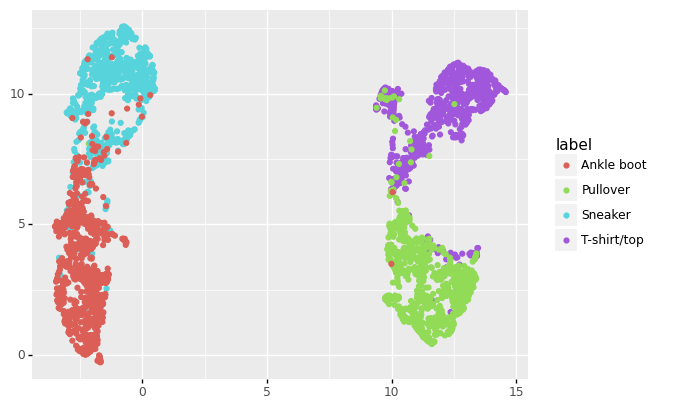

<ggplot: (105136341480)>

In [11]:
plot_fashion_mnist(mnist_pca, mnist_labels, "MNIST_UMAP_0279.png")

### Effect of contamination for setup 1

In [5]:
test_X,_= contaminated(1000, stats.multivariate_t, 0, loc=np.zeros((2)), shape=np.eye(2), df=20, hard=True) # Gaussian
test_X2,_= contaminated(1000, stats.multivariate_t, 0.5, loc=np.zeros((2)), shape=np.eye(2), df=20, hard=True) # Gaussian
bins = np.linspace(-20,20,100)

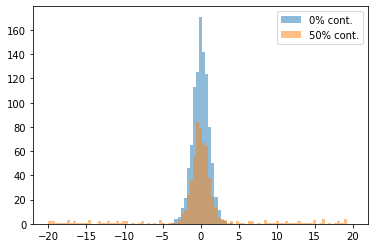

In [6]:
plt.hist(test_X[:,0], bins=bins, alpha=0.5, label='0% cont.')
plt.hist(test_X2[:,0], bins=bins, alpha=0.5, label='50% cont.')
plt.legend()
plt.savefig('setup1_histograms.pdf', bbox_inches = 'tight',pad_inches = 0.02)

### Vis of Generalised Gaussian for setup 2

In [7]:
test_X = LaplacesDemon.rmvpe(1000, mu=np.array([0,0]), Sigma=np.array([[1,0],[0,1]]), kappa=0.1)

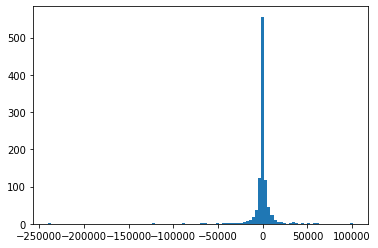

In [8]:
plt.hist(test_X[:,0], bins=100)
plt.savefig('setup2_histogram.pdf', bbox_inches = 'tight',pad_inches = 0.02)